## 一，Stable Diffussion模型原理


目前开源的最火爆的AI绘画系统是 Stable Diffusion 模型（稳定扩散模型）。

可以完成 text2img, img2img, depth2img【深度图转图像】, seg2img【语义分割图转图像】 等基于提示信息【prompt】的图画创作功能。


其核心原理简要总结如下：

1，通过Attention机制引入text /semantic_map/ input_image ...等控制信息。--> 构图

2，在Attention控制下通过UNet模型在隐空间通过反向扩散机制从初始的噪声中一步一步(通常20到50步)清洗噪声生成隐空间图片信息(Latent Diffusion Model过程)。--> 底片

3，最后通过 AutoDecoder 从隐空间的图片信息还原成高清图片。--> 成片

从易到难的详细原理参考：

《零基础读懂Stable Diffusion》 https://zhuanlan.zhihu.com/p/597247221 （zero mathematics）

《Stable Diffusion原理解读》 https://zhuanlan.zhihu.com/p/583124756 （some mathematics）
    
《当我们谈论Text-to-image:Stable Model》https://zhuanlan.zhihu.com/p/550967884 （heavy mathematics）

B站视频演示：https://www.bilibili.com/video/BV1w54y1w72w/

## 二，在线体验方法


* 英文原始: https://huggingface.co/spaces/runwayml/stable-diffusion-v1-5

* 百度中文：https://wenxin.baidu.com/ernie-vilg?curtype=exp

* 太乙中文： https://huggingface.co/spaces/IDEA-CCNL/Taiyi-Stable-Diffusion-Chinese-Webui

* 各种风格：https://civitai.com/

## 三，在Kaggle中体验

In [ ]:
!pip install diffusers
!pip install transformers 

### 1，text2img 

In [1]:
from PIL import Image
import torch

from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline
)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model_id = "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-v0.1"
#model_id = "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-EN-v0.1"
#model_id = "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Anime-Chinese-v0.1" #漫画头像
#model_id = "CompVis/stable-diffusion-v1-4"
#model_id = "runwayml/stable-diffusion-v1-5"
model_id = "stabilityai/stable-diffusion-2-1"

pipe_text2img = StableDiffusionPipeline.from_pretrained(model_id, 
                        torch_dtype=torch.float16).to(device)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/939 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

  0%|          | 0/20 [00:00<?, ?it/s]

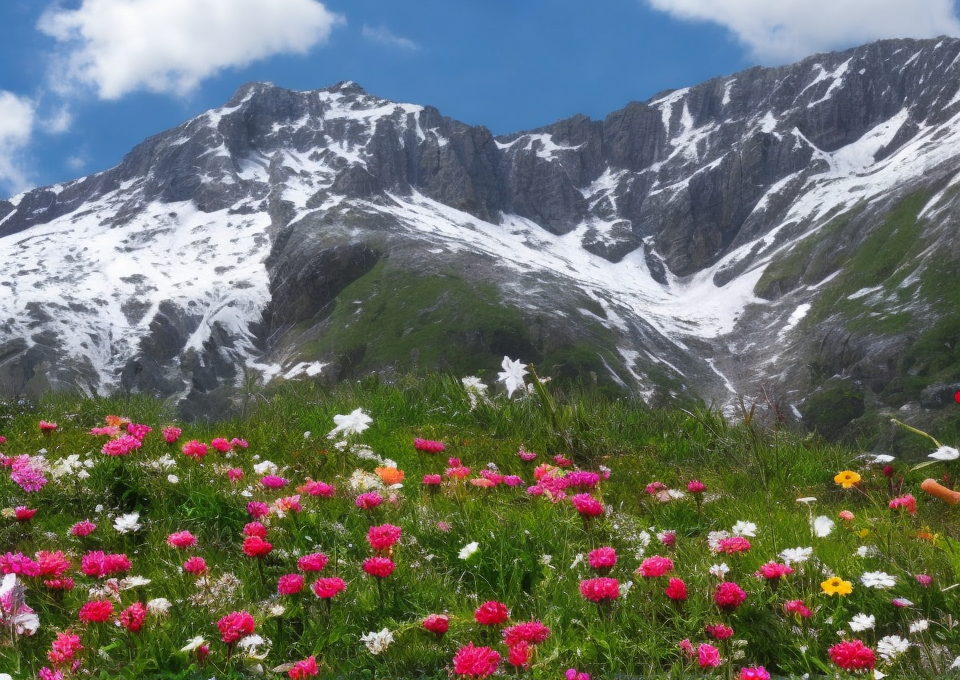

In [2]:
width = 960
height = 680
guide = 7
steps = 20

prompt = "a moutain full of flowers and snows"
#prompt = "Bejing Autumn"
#prompt = 'shanghai night'
#prompt = 'a dog is runing after a mouse'
#prompt = 'a little girl is smiling with a cat'

negative_prompt = None
output = pipe_text2img(prompt = prompt, negative_prompt=negative_prompt,width=width, height=height,
                       guidance_scale=guide, num_inference_steps=steps)
out_img = output.images[0]
out_img 



In [ ]:
out_img.save('moutain_snow_flowers.jpg')

### 2，img2img  

In [3]:
from PIL import Image
import torch

from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionInpaintPipeline
)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model_id = "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-v0.1"
#model_id = "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-EN-v0.1"
#model_id = "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Anime-Chinese-v0.1" 
#model_id = "CompVis/stable-diffusion-v1-4"
#model_id = "runwayml/stable-diffusion-v1-5"
model_id = "stabilityai/stable-diffusion-2-1"

pipe_img2img = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, 
                        torch_dtype=torch.float16).to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

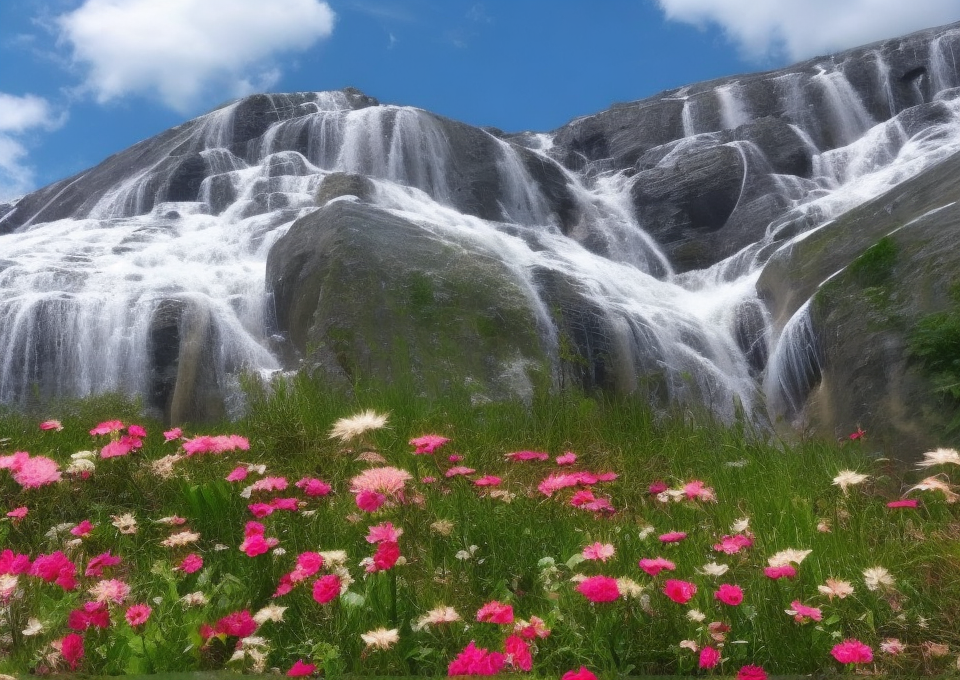

In [4]:
strength = 0.5
revise_prompt = "there is a water fall"
revised_output = pipe_img2img(revise_prompt, image=out_img, strength=strength, 
                      guidance_scale=guide, 
                      num_inference_steps=steps)
revised_output.images[0]


### 3，pix2pix

In [5]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)


def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"

image = download_image(url)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

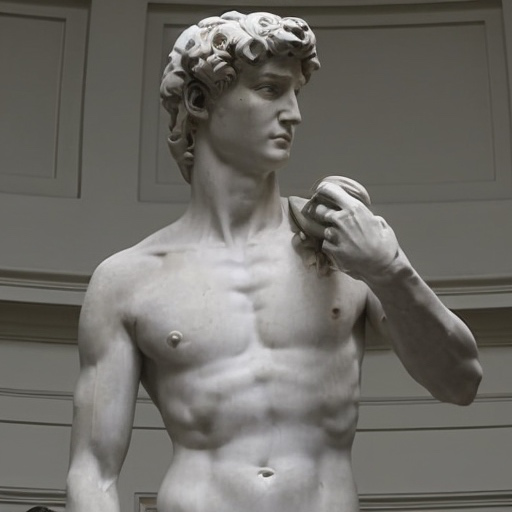

In [6]:
image

  0%|          | 0/10 [00:00<?, ?it/s]

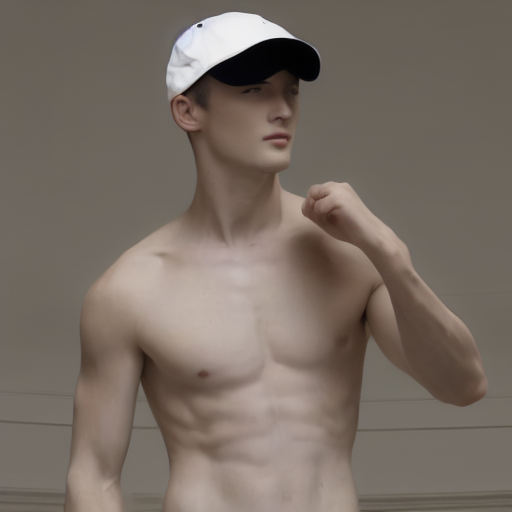

In [8]:
#prompt = "turn him into cyborg" 
#prompt = "turn him into oil painting"
#prompt = "let he in the wild, green grass"
#prompt = "a flower in his left hand"
#prompt = "let he wear a coat"
prompt = "let he wear a cap on the head"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1.0).images
images[0]